## Time series forecasting fundamentals with tensorflow

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## importing time series with pandas

In [1]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many sample
len(df)

2787

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin')

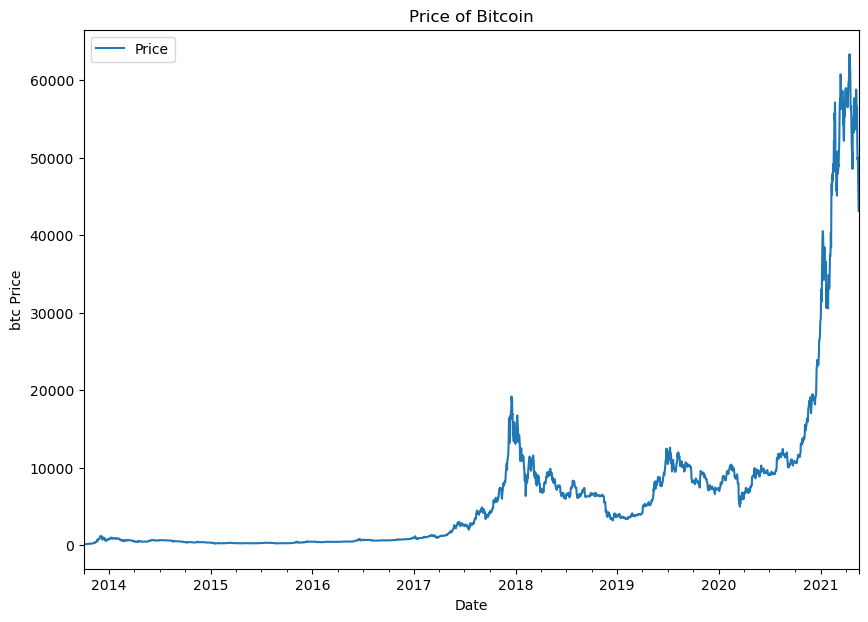

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("btc Price")
plt.title("Price of Bitcoin")

## Importing time series data with python's csv module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
      timesteps.append(datetime.strptime(row[1], "%Y-%m-%d"))
      btc_price.append(float(row[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

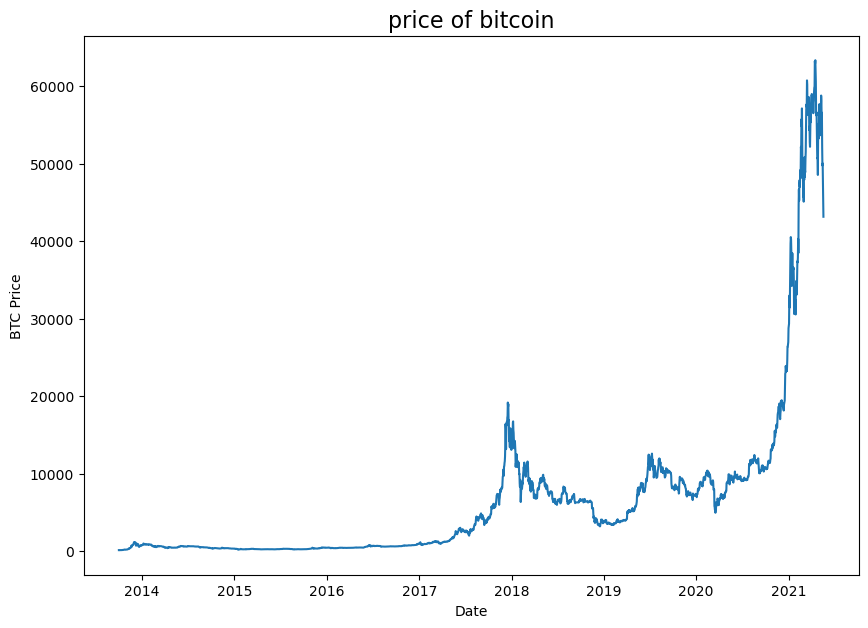

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("price of bitcoin", fontsize=16)
plt.xlabel("Date")

## Format data part 1: Create train and test sets

### the wrong way

In [9]:
from sklearn.model_selection import train_test_split
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

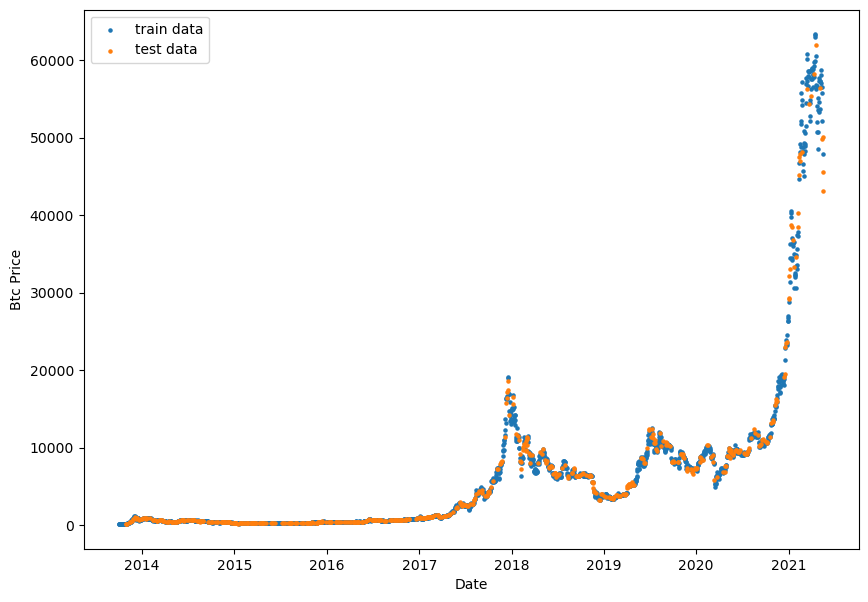

In [11]:
# plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("Btc Price")
plt.legend()

### the right way

In [12]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

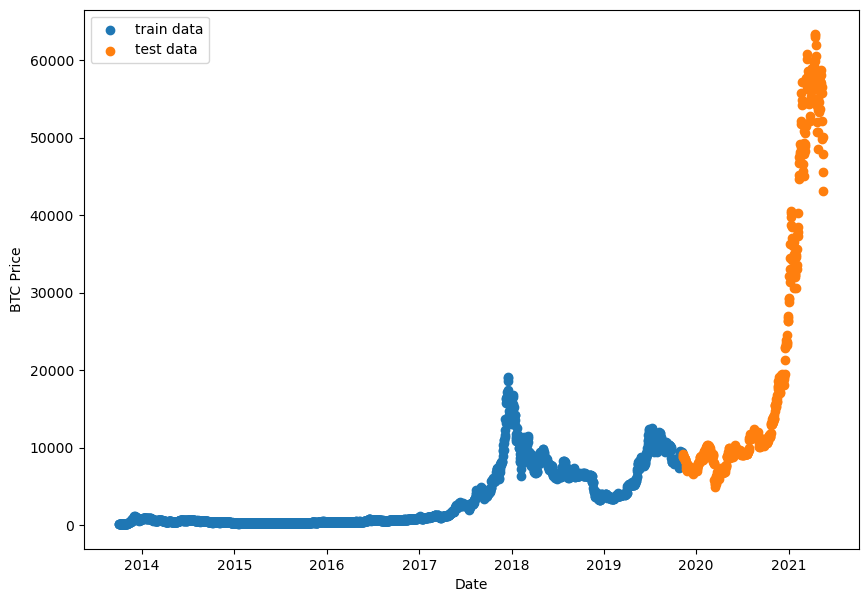

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_test, y_test, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend()

## Create a plotting function


In [14]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


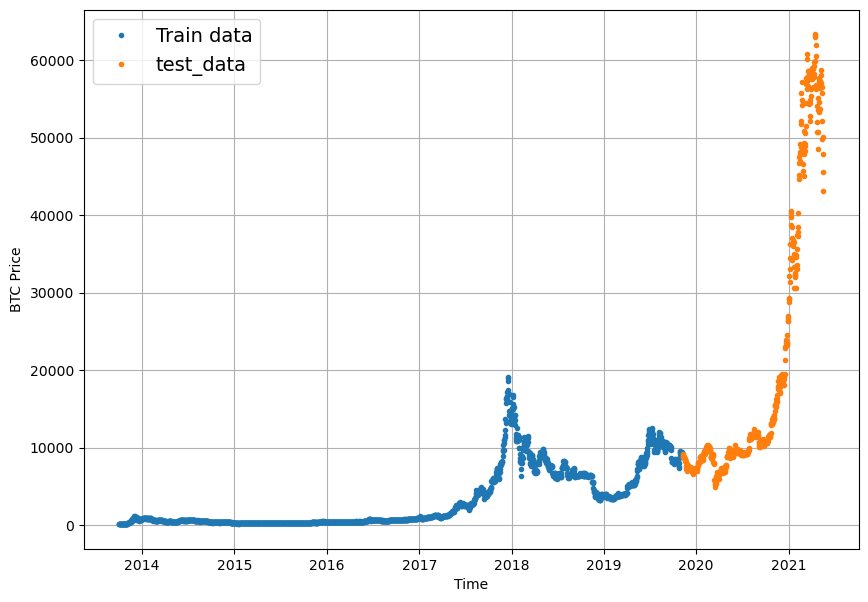

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test_data")

## Modelling Experiments

## Model 0: Naive forecast (baseline)

In [16]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

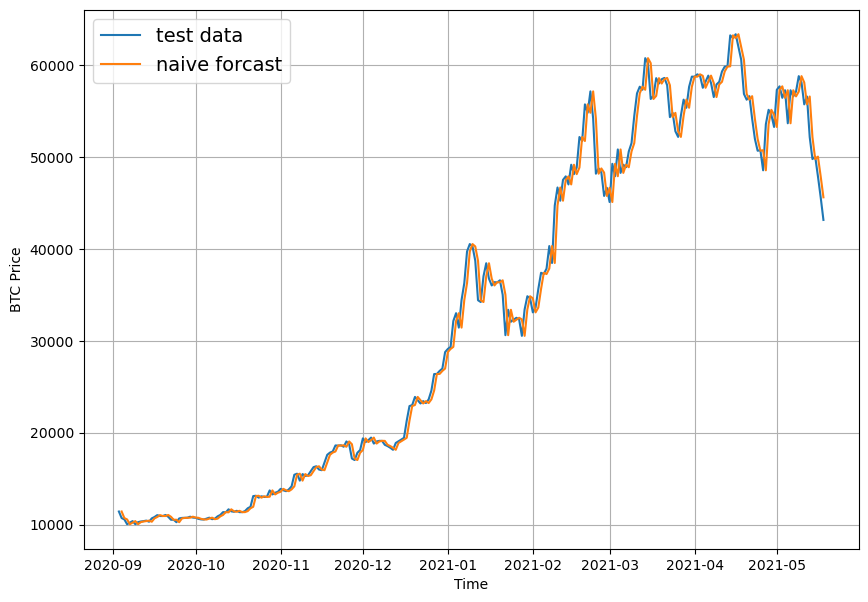

In [17]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format='-', label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=300, format='-', label="naive forcast")

## Evaluating a time series model
* MAE
* MSE
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error


In [18]:
import tensorflow as tf

C:\Users\my pc\.conda\envs\p3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182626

In [21]:
def evaluation_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  metrics = {}
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()

  metrics["mae"] = mae
  metrics["mse"] = mse
  metrics["mase"] = mase
  metrics["rmse"] = rmse
  metrics["mape"] = mape

  return metrics

In [22]:
naive_results = evaluation_preds(y_test[1:], naive_forecast)

## Format data part2: Windowing our dataset

In [23]:
HORIZON = 1
WINDOW_SIZE = 7


In [24]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [26]:
btc_windowed = []
for i in range(len(btc_price)):
  btc_windowed.append([btc_price[i:WINDOW_SIZE+i], btc_price[i+WINDOW_SIZE:i+WINDOW_SIZE+HORIZON]])

In [27]:
import numpy as np
# Create a function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  # print(f'window idexes:\n{window_indexes, window_indexes.shape}')

  windowed_array = x[window_indexes]
  # print(windowed_array)
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
for i in range(3):
  print(f'window:{full_windows[i]} -> horizon:{full_labels[i]}')

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> horizon:[123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> horizon:[124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> horizon:[125.96116]


In [30]:
for i in range(3):
  print(f'window:{full_windows[i-3]} -> horizon:{full_labels[i-3]}')

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> horizon:[47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> horizon:[45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> horizon:[43144.47129086]


## Turning windows into training and test sets

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):
  index = int(len(windows) * (1-test_split))
  X_train, y_train = windows[:index], labels[:index]
  X_test, y_test = windows[index:], labels[index:]
  return X_train, X_test, y_train, y_test


In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

## Make a modelling checkpoint


In [35]:
import os

# Create a function to implement a modelCheckpoint
def create_model_checkpoint(model_name, save_path="model_experiemnts"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

In [36]:
tf.random.set_seed(42)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', "mse"])

In [38]:
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 3232.2766 - mae: 3232.2766 - mse: 21581630.0000
Epoch 1: val_loss improved from inf to 2755.63477, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 66ms/step - loss: 1342.8828 - mae: 1342.8828 - mse: 6434447.0000 - val_loss: 2755.6348 - val_mae: 2755.6348 - val_mse: 18134912.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 430.6263 - mae: 430.6263 - mse: 883517.2500
Epoch 2: val_loss improved from 2755.63477 to 1798.46228, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 82ms/step - loss: 374.1525 - mae: 374.1525 - mse: 559543.8125 - val_loss: 1798.4623 - val_mae: 1798.4623 - val_mse: 7856139.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 242.5353 - mae: 242.5353 - mse: 200257.0625
Epoch 3: val_loss improved from 1798.46228 to 1390.37256, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 227.1511 - mae: 227.1511 - mse: 255582.5312 - val_loss: 1390.3726 - val_mae: 1390.3726 - val_mse: 5228669.0000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 206.0074 - mae: 206.0074 - mse: 217623.3281
Epoch 4: val_loss improved from 1390.37256 to 1179.73169, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 203.9984 - mae: 203.9984 - mse: 214192.4062 - val_loss: 1179.7317 - val_mae: 1179.7317 - val_mse: 4233981.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 190.1208 - mae: 190.1208 - mse: 131922.7188
Epoch 5: val_loss improved from 1179.73169 to 1103.07751, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 97ms/step - loss: 198.5409 - mae: 198.5409 - mse: 209359.7656 - val_loss: 1103.0775 - val_mae: 1103.0775 - val_mse: 3895904.7500
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 195.4069 - mae: 195.4069 - mse: 191851.5938
Epoch 6: val_loss did not improve from 1103.07751
18/18 [==============================] - 0s 7ms/step - loss: 196.0009 - mae: 196.0009 - mse: 200250.2500 - val_loss: 1112.3832 - val_mae: 1112.3832 - val_mse: 4056024.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 240.7770 - mae: 240.7770 - mse: 375331.0625
Epoch 7: val_loss improved from 1103.07751 to 1051.76233, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 192.4821 - mae: 192.4821 - mse: 194813.7031 - val_loss: 1051.7623 - val_mae: 1051.7623 - val_mse: 3564786.7500
Epoch 8/100
 9/18 [==============>...............] - ETA: 0s - loss: 180.2366 - mae: 180.2366 - mse: 156771.6875
Epoch 8: val_loss improved from 1051.76233 to 1043.82239, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 94ms/step - loss: 186.3366 - mae: 186.3366 - mse: 181448.5156 - val_loss: 1043.8224 - val_mae: 1043.8224 - val_mse: 3449744.2500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 149.5110 - mae: 149.5110 - mse: 101899.8125
Epoch 9: val_loss improved from 1043.82239 to 1020.43347, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 179.8002 - mae: 179.8002 - mse: 173524.0625 - val_loss: 1020.4335 - val_mae: 1020.4335 - val_mse: 3287316.5000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 195.1465 - mae: 195.1465 - mse: 252931.2812
Epoch 10: val_loss improved from 1020.43347 to 973.07397, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 79ms/step - loss: 174.3929 - mae: 174.3929 - mse: 164495.5938 - val_loss: 973.0740 - val_mae: 973.0740 - val_mse: 3039378.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 190.1339 - mae: 190.1339 - mse: 158361.4688
Epoch 11: val_loss improved from 973.07397 to 940.65149, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 168.7390 - mae: 168.7390 - mse: 153392.8906 - val_loss: 940.6515 - val_mae: 940.6515 - val_mse: 2859812.7500
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 162.8845 - mae: 162.8845 - mse: 144335.3750
Epoch 12: val_loss did not improve from 940.65149
18/18 [==============================] - 0s 7ms/step - loss: 163.4709 - mae: 163.4709 - mse: 145232.9062 - val_loss: 968.7422 - val_mae: 968.7422 - val_mse: 2839600.7500
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 160.4195 - mae: 160.4195 - mse: 142849.4219
Epoch 13: val_loss improved from 940.65149 to 903.89410, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 86ms/step - loss: 160.4195 - mae: 160.4195 - mse: 142849.4219 - val_loss: 903.8941 - val_mae: 903.8941 - val_mse: 2575573.2500
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 153.6708 - mae: 153.6708 - mse: 130884.1406
Epoch 14: val_loss improved from 903.89410 to 879.81342, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 40ms/step - loss: 153.6708 - mae: 153.6708 - mse: 130884.1406 - val_loss: 879.8134 - val_mae: 879.8134 - val_mse: 2436308.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 153.3981 - mae: 153.3981 - mse: 82813.3281
Epoch 15: val_loss did not improve from 879.81342
18/18 [==============================] - 0s 5ms/step - loss: 152.7498 - mae: 152.7498 - mse: 128181.4531 - val_loss: 922.6575 - val_mae: 922.6575 - val_mse: 2496568.7500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 145.0764 - mae: 145.0764 - mse: 84929.2656
Epoch 16: val_loss improved from 879.81342 to 840.80841, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 147.7380 - mae: 147.7380 - mse: 120924.8203 - val_loss: 840.8084 - val_mae: 840.8084 - val_mse: 2202225.5000
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 143.6869 - mae: 143.6869 - mse: 115853.8516
Epoch 17: val_loss improved from 840.80841 to 820.16882, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 86ms/step - loss: 143.9839 - mae: 143.9839 - mse: 115437.1641 - val_loss: 820.1688 - val_mae: 820.1688 - val_mse: 2098510.7500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2767 - mae: 145.2767 - mse: 102252.0078
Epoch 18: val_loss did not improve from 820.16882
18/18 [==============================] - 0s 6ms/step - loss: 141.7394 - mae: 141.7394 - mse: 112557.0234 - val_loss: 834.1465 - val_mae: 834.1465 - val_mse: 2092147.3750
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 85.7267 - mae: 85.7267 - mse: 40515.4180
Epoch 19: val_loss did not improve from 820.16882
18/18 [==============================] - 0s 6ms/step - loss: 137.1410 - mae: 137.1410 - mse: 105892.1250 - val_loss: 820.5617 - val_mae: 820.5617 - val_mse: 2021282.5000
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 138.0256 - mae: 138.0256 - mse: 106623.8906
Epoch 20: val_loss improved from 820.16882 to 745.

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 101ms/step - loss: 134.2601 - mae: 134.2601 - mse: 103067.5859 - val_loss: 745.6939 - val_mae: 745.6939 - val_mse: 1823337.7500
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 135.5394 - mae: 135.5394 - mse: 98664.1719 
Epoch 21: val_loss improved from 745.69391 to 732.07544, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 58ms/step - loss: 135.6678 - mae: 135.6678 - mse: 103399.8984 - val_loss: 732.0754 - val_mae: 732.0754 - val_mse: 1750323.5000
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 134.2198 - mae: 134.2198 - mse: 103869.1875
Epoch 22: val_loss improved from 732.07544 to 720.57361, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 77ms/step - loss: 133.1999 - mae: 133.1999 - mse: 100322.8438 - val_loss: 720.5736 - val_mae: 720.5736 - val_mse: 1694369.6250
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 130.5963 - mae: 130.5963 - mse: 92799.4688
Epoch 23: val_loss improved from 720.57361 to 714.92590, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 110ms/step - loss: 131.4321 - mae: 131.4321 - mse: 97453.7656 - val_loss: 714.9259 - val_mae: 714.9259 - val_mse: 1654502.3750
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 130.8364 - mae: 130.8364 - mse: 97952.4062 
Epoch 24: val_loss did not improve from 714.92590
18/18 [==============================] - 0s 8ms/step - loss: 129.3113 - mae: 129.3113 - mse: 94204.2188 - val_loss: 720.2134 - val_mae: 720.2134 - val_mse: 1713376.2500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9066 - mae: 128.9066 - mse: 63116.6484
Epoch 25: val_loss improved from 714.92590 to 699.33063, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 40ms/step - loss: 128.1337 - mae: 128.1337 - mse: 91155.5547 - val_loss: 699.3306 - val_mae: 699.3306 - val_mse: 1627280.3750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 142.9200 - mae: 142.9200 - mse: 91953.6719
Epoch 26: val_loss did not improve from 699.33063
18/18 [==============================] - 0s 6ms/step - loss: 130.2278 - mae: 130.2278 - mse: 92933.2969 - val_loss: 712.3696 - val_mae: 712.3696 - val_mse: 1673933.6250
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 184.0681 - mae: 184.0681 - mse: 156714.0938
Epoch 27: val_loss improved from 699.33063 to 674.12677, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 71ms/step - loss: 128.6089 - mae: 128.6089 - mse: 92238.2266 - val_loss: 674.1268 - val_mae: 674.1268 - val_mse: 1507092.8750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2279 - mae: 120.2279 - mse: 79863.8672
Epoch 28: val_loss did not improve from 674.12677
18/18 [==============================] - 0s 6ms/step - loss: 124.7808 - mae: 124.7808 - mse: 87415.9141 - val_loss: 686.7030 - val_mae: 686.7030 - val_mse: 1518932.7500
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2529 - mae: 123.2529 - mse: 92750.6250
Epoch 29: val_loss improved from 674.12677 to 665.52612, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 76ms/step - loss: 122.0579 - mae: 122.0579 - mse: 86138.5234 - val_loss: 665.5261 - val_mae: 665.5261 - val_mse: 1463440.0000
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 126.4123 - mae: 126.4123 - mse: 87947.0391
Epoch 30: val_loss improved from 665.52612 to 665.47888, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 74ms/step - loss: 126.1046 - mae: 126.1046 - mse: 87217.5312 - val_loss: 665.4789 - val_mae: 665.4789 - val_mse: 1455347.3750
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 121.8966 - mae: 121.8966 - mse: 83436.6797
Epoch 31: val_loss did not improve from 665.47888
18/18 [==============================] - 0s 7ms/step - loss: 122.4073 - mae: 122.4073 - mse: 83542.6016 - val_loss: 695.8696 - val_mae: 695.8696 - val_mse: 1522481.1250
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 118.7924 - mae: 118.7924 - mse: 84139.1641
Epoch 32: val_loss improved from 665.47888 to 648.46906, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 54ms/step - loss: 120.3716 - mae: 120.3716 - mse: 84936.1406 - val_loss: 648.4691 - val_mae: 648.4691 - val_mse: 1406096.0000
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 120.4468 - mae: 120.4468 - mse: 82422.5156 
Epoch 33: val_loss did not improve from 648.46906
18/18 [==============================] - 0s 7ms/step - loss: 120.4468 - mae: 120.4468 - mse: 82422.5156 - val_loss: 658.7980 - val_mae: 658.7980 - val_mse: 1423071.2500
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0811 - mae: 119.0811 - mse: 83842.0625
Epoch 34: val_loss improved from 648.46906 to 637.80731, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 100ms/step - loss: 119.5371 - mae: 119.5371 - mse: 83708.9453 - val_loss: 637.8073 - val_mae: 637.8073 - val_mse: 1370709.0000
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 117.4748 - mae: 117.4748 - mse: 81924.5312
Epoch 35: val_loss improved from 637.80731 to 633.49512, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 117.4748 - mae: 117.4748 - mse: 81924.5312 - val_loss: 633.4951 - val_mae: 633.4951 - val_mse: 1362684.7500
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 157.4818 - mae: 157.4818 - mse: 162866.9531
Epoch 36: val_loss did not improve from 633.49512
18/18 [==============================] - 0s 8ms/step - loss: 122.6625 - mae: 122.6625 - mse: 83164.1172 - val_loss: 659.7999 - val_mae: 659.7999 - val_mse: 1413711.6250
Epoch 37/100
13/18 [====================>.........] - ETA: 0s - loss: 120.2279 - mae: 120.2279 - mse: 84547.9844 
Epoch 37: val_loss did not improve from 633.49512
18/18 [==============================] - 0s 13ms/step - loss: 119.4756 - mae: 119.4756 - mse: 82710.6641 - val_loss: 633.6523 - val_mae: 633.6523 - val_mse: 1367448.0000
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 117.7768 - mae: 117.7768 - mse: 79722.3906
Epoch 38: val_loss improved from 633.49512 to 624.

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 86ms/step - loss: 116.9627 - mae: 116.9627 - mse: 80731.5469 - val_loss: 624.4202 - val_mae: 624.4202 - val_mse: 1326500.1250
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5330 - mae: 135.5330 - mse: 96868.1250
Epoch 39: val_loss did not improve from 624.42017
18/18 [==============================] - 0s 5ms/step - loss: 116.4987 - mae: 116.4987 - mse: 80620.5156 - val_loss: 630.4312 - val_mae: 630.4312 - val_mse: 1355178.1250
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 107.2829 - mae: 107.2829 - mse: 90537.7188
Epoch 40: val_loss improved from 624.42017 to 619.81604, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 114.6592 - mae: 114.6592 - mse: 78524.3516 - val_loss: 619.8160 - val_mae: 619.8160 - val_mse: 1317242.8750
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 103.7014 - mae: 103.7014 - mse: 51499.6172
Epoch 41: val_loss did not improve from 619.81604
18/18 [==============================] - 0s 6ms/step - loss: 115.7865 - mae: 115.7865 - mse: 78270.5000 - val_loss: 630.5151 - val_mae: 630.5151 - val_mse: 1355480.7500
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 107.0482 - mae: 107.0482 - mse: 58437.0469
Epoch 42: val_loss did not improve from 619.81604
18/18 [==============================] - 0s 6ms/step - loss: 117.9131 - mae: 117.9131 - mse: 80498.4688 - val_loss: 625.6473 - val_mae: 625.6473 - val_mse: 1321826.2500
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 96.6179 - mae: 96.6179 - mse: 57937.9062
Epoch 43: val_loss did not improve from 619.81604
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 72ms/step - loss: 114.0635 - mae: 114.0635 - mse: 77868.3125 - val_loss: 613.7162 - val_mae: 613.7162 - val_mse: 1288369.5000
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 85.0395 - mae: 85.0395 - mse: 48779.9492
Epoch 46: val_loss improved from 613.71625 to 607.79987, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 113.4848 - mae: 113.4848 - mse: 76748.6641 - val_loss: 607.7999 - val_mae: 607.7999 - val_mse: 1274202.8750
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 102.0303 - mae: 102.0303 - mse: 78098.6094
Epoch 47: val_loss did not improve from 607.79987
18/18 [==============================] - 0s 6ms/step - loss: 117.1762 - mae: 117.1762 - mse: 80167.0469 - val_loss: 740.1514 - val_mae: 740.1514 - val_mse: 1600745.5000
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 121.1929 - mae: 121.1929 - mse: 77240.1562
Epoch 48: val_loss improved from 607.79987 to 601.75598, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 51ms/step - loss: 113.5462 - mae: 113.5462 - mse: 76004.8359 - val_loss: 601.7560 - val_mae: 601.7560 - val_mse: 1257715.2500
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 114.4882 - mae: 114.4882 - mse: 76989.0469
Epoch 49: val_loss did not improve from 601.75598
18/18 [==============================] - 0s 6ms/step - loss: 114.4882 - mae: 114.4882 - mse: 76989.0469 - val_loss: 602.7834 - val_mae: 602.7834 - val_mse: 1261372.3750
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1214 - mae: 135.1214 - mse: 139031.2500
Epoch 50: val_loss did not improve from 601.75598
18/18 [==============================] - 0s 6ms/step - loss: 116.8531 - mae: 116.8531 - mse: 77115.0781 - val_loss: 611.1740 - val_mae: 611.1740 - val_mse: 1274708.2500
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 98.9684 - mae: 98.9684 - mse: 54411.0859
Epoch 51: val_loss improved from 601.75598 to 601.5138

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 49ms/step - loss: 113.8319 - mae: 113.8319 - mse: 74295.6016 - val_loss: 601.5139 - val_mae: 601.5139 - val_mse: 1253240.0000
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 121.9729 - mae: 121.9729 - mse: 65321.3750
Epoch 52: val_loss did not improve from 601.51385
18/18 [==============================] - 0s 5ms/step - loss: 112.8437 - mae: 112.8437 - mse: 76314.3516 - val_loss: 627.8534 - val_mae: 627.8534 - val_mse: 1337010.8750
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 69.0619 - mae: 69.0619 - mse: 29621.6328
Epoch 53: val_loss did not improve from 601.51385
18/18 [==============================] - 0s 22ms/step - loss: 114.9926 - mae: 114.9926 - mse: 77115.5781 - val_loss: 645.5269 - val_mae: 645.5269 - val_mse: 1348192.1250
Epoch 54/100
11/18 [=================>............] - ETA: 0s - loss: 123.4166 - mae: 123.4166 - mse: 77883.9766
Epoch 54: val_loss did not improve from 601.51385
18/1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 122.2582 - mae: 122.2582 - mse: 77884.2266 - val_loss: 598.7803 - val_mae: 598.7803 - val_mse: 1243823.8750
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 108.5711 - mae: 108.5711 - mse: 114937.9219
Epoch 56: val_loss did not improve from 598.78033
18/18 [==============================] - 0s 9ms/step - loss: 112.8136 - mae: 112.8136 - mse: 74905.6719 - val_loss: 765.1177 - val_mae: 765.1177 - val_mse: 1747154.8750
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 106.6593 - mae: 106.6593 - mse: 37890.5352
Epoch 57: val_loss did not improve from 598.78033
18/18 [==============================] - 0s 6ms/step - loss: 125.7589 - mae: 125.7589 - mse: 85478.3828 - val_loss: 688.1539 - val_mae: 688.1539 - val_mse: 1508088.6250
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 100.3286 - mae: 100.3286 - mse: 36277.7461
Epoch 58: val_loss improved from 598.78033 to 591.89

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 3s 181ms/step - loss: 115.9085 - mae: 115.9085 - mse: 75192.0781 - val_loss: 591.8937 - val_mae: 591.8937 - val_mse: 1228111.0000
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 109.6511 - mae: 109.6511 - mse: 75602.7422
Epoch 59: val_loss did not improve from 591.89368
18/18 [==============================] - 0s 8ms/step - loss: 109.9979 - mae: 109.9979 - mse: 73459.7266 - val_loss: 612.0479 - val_mae: 612.0479 - val_mse: 1289580.2500
Epoch 60/100
15/18 [========================>.....] - ETA: 0s - loss: 113.5170 - mae: 113.5170 - mse: 76125.3594
Epoch 60: val_loss did not improve from 591.89368
18/18 [==============================] - 0s 9ms/step - loss: 112.0985 - mae: 112.0985 - mse: 75221.3828 - val_loss: 606.1625 - val_mae: 606.1625 - val_mse: 1253482.6250
Epoch 61/100
14/18 [======================>.......] - ETA: 0s - loss: 109.7270 - mae: 109.7270 - mse: 72937.3359 
Epoch 61: val_loss improved from 591.89368 to 589.6

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 85ms/step - loss: 110.2597 - mae: 110.2597 - mse: 73869.2812 - val_loss: 589.6489 - val_mae: 589.6489 - val_mse: 1219241.1250
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 70.4592 - mae: 70.4592 - mse: 29221.3438
Epoch 62: val_loss did not improve from 589.64893
18/18 [==============================] - 0s 6ms/step - loss: 108.6071 - mae: 108.6071 - mse: 71960.4062 - val_loss: 590.0402 - val_mae: 590.0402 - val_mse: 1224646.2500
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0461 - mae: 95.0461 - mse: 78121.7500
Epoch 63: val_loss did not improve from 589.64893
18/18 [==============================] - 0s 6ms/step - loss: 113.5596 - mae: 113.5596 - mse: 75035.3672 - val_loss: 628.4235 - val_mae: 628.4235 - val_mse: 1299256.5000
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 93.4786 - mae: 93.4786 - mse: 39762.4922
Epoch 64: val_loss did not improve from 589.64893
18/18 [==

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 93ms/step - loss: 113.2383 - mae: 113.2383 - mse: 75225.6172 - val_loss: 587.2078 - val_mae: 587.2078 - val_mse: 1217313.6250
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 109.4415 - mae: 109.4415 - mse: 72442.2969
Epoch 66: val_loss did not improve from 587.20782
18/18 [==============================] - 1s 43ms/step - loss: 109.1956 - mae: 109.1956 - mse: 71691.7812 - val_loss: 589.1165 - val_mae: 589.1165 - val_mse: 1223152.1250
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 106.8659 - mae: 106.8659 - mse: 68458.4141
Epoch 67: val_loss did not improve from 587.20782
18/18 [==============================] - 0s 17ms/step - loss: 108.3152 - mae: 108.3152 - mse: 71211.3828 - val_loss: 671.9039 - val_mae: 671.9039 - val_mse: 1448942.2500
Epoch 68/100
15/18 [========================>.....] - ETA: 0s - loss: 115.2692 - mae: 115.2692 - mse: 71908.7656
Epoch 68: val_loss did not improve from 587.20782
1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 109.7747 - mae: 109.7747 - mse: 72800.1328 - val_loss: 586.8975 - val_mae: 586.8975 - val_mse: 1207181.0000
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 124.9528 - mae: 124.9528 - mse: 134828.7031
Epoch 73: val_loss did not improve from 586.89746
18/18 [==============================] - 0s 6ms/step - loss: 111.3130 - mae: 111.3130 - mse: 73145.7500 - val_loss: 621.4380 - val_mae: 621.4380 - val_mse: 1305132.2500
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 166.1354 - mae: 166.1354 - mse: 176873.3750
Epoch 74: val_loss did not improve from 586.89746
18/18 [==============================] - 0s 8ms/step - loss: 108.1417 - mae: 108.1417 - mse: 71769.0078 - val_loss: 587.1320 - val_mae: 587.1320 - val_mse: 1205369.7500
Epoch 75/100
16/18 [=========================>....] - ETA: 0s - loss: 109.0776 - mae: 109.0776 - mse: 69619.4453
Epoch 75: val_loss did not improve from 586.89746
1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 94ms/step - loss: 115.3995 - mae: 115.3995 - mse: 75748.1719 - val_loss: 579.3911 - val_mae: 579.3911 - val_mse: 1196162.2500
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.0021 - mae: 83.0021 - mse: 63822.4414
Epoch 77: val_loss did not improve from 579.39105
18/18 [==============================] - 0s 6ms/step - loss: 112.0162 - mae: 112.0162 - mse: 72462.2891 - val_loss: 596.8438 - val_mae: 596.8438 - val_mse: 1241638.5000
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 108.8367 - mae: 108.8367 - mse: 71630.0469
Epoch 78: val_loss improved from 579.39105 to 577.00171, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 58ms/step - loss: 108.8367 - mae: 108.8367 - mse: 71630.0469 - val_loss: 577.0017 - val_mae: 577.0017 - val_mse: 1189039.2500
Epoch 79/100
16/18 [=========================>....] - ETA: 0s - loss: 109.9454 - mae: 109.9454 - mse: 75670.1641
Epoch 79: val_loss did not improve from 577.00171
18/18 [==============================] - 0s 21ms/step - loss: 108.5040 - mae: 108.5040 - mse: 72972.1328 - val_loss: 588.7299 - val_mae: 588.7299 - val_mse: 1221618.8750
Epoch 80/100
10/18 [===============>..............] - ETA: 0s - loss: 108.0971 - mae: 108.0971 - mse: 78771.6797 
Epoch 80: val_loss did not improve from 577.00171
18/18 [==============================] - 0s 17ms/step - loss: 107.7580 - mae: 107.7580 - mse: 71608.3828 - val_loss: 587.3776 - val_mae: 587.3776 - val_mse: 1202160.7500
Epoch 81/100
12/18 [===================>..........] - ETA: 0s - loss: 108.5043 - mae: 108.5043 - mse: 72617.2422
Epoch 81: val_loss did not improve from 577.00171


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 107.8901 - mae: 107.8901 - mse: 70339.1016 - val_loss: 576.1210 - val_mae: 576.1210 - val_mse: 1190141.1250
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 121.5837 - mae: 121.5837 - mse: 75746.6484
Epoch 90: val_loss did not improve from 576.12097
18/18 [==============================] - 0s 6ms/step - loss: 106.9254 - mae: 106.9254 - mse: 68725.0781 - val_loss: 622.5714 - val_mae: 622.5714 - val_mse: 1273131.8750
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 94.1209 - mae: 94.1209 - mse: 29871.2305
Epoch 91: val_loss did not improve from 576.12097
18/18 [==============================] - 0s 6ms/step - loss: 113.0449 - mae: 113.0449 - mse: 73688.2109 - val_loss: 632.5424 - val_mae: 632.5424 - val_mse: 1323787.0000
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 109.4725 - mae: 109.4725 - mse: 72182.8125
Epoch 92: val_loss did not improve from 576.12097
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 79ms/step - loss: 109.4646 - mae: 109.4646 - mse: 70373.9766 - val_loss: 575.4427 - val_mae: 575.4427 - val_mse: 1177066.6250
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 149.2370 - mae: 149.2370 - mse: 123504.0000
Epoch 99: val_loss improved from 575.44269 to 571.38623, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 47ms/step - loss: 107.7299 - mae: 107.7299 - mse: 71112.6016 - val_loss: 571.3862 - val_mae: 571.3862 - val_mse: 1172115.1250
Epoch 100/100
16/18 [=========================>....] - ETA: 0s - loss: 113.5454 - mae: 113.5454 - mse: 73831.6641
Epoch 100: val_loss did not improve from 571.38623
18/18 [==============================] - 0s 9ms/step - loss: 110.0283 - mae: 110.0283 - mse: 70388.1250 - val_loss: 612.4269 - val_mae: 612.4269 - val_mse: 1249663.0000


In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 612.4269 - mae: 612.4269 - mse: 1249663.0000


[612.4269409179688, 612.4269409179688, 1249663.0]

In [40]:
# Load in the best performing model_1
model_1 = tf.keras.models.load_model("model_experiemnts/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.3862 - mae: 571.3862 - mse: 1172115.0000


[571.38623046875, 571.38623046875, 1172115.0]

## Making forecasts with a model (on the test dataset)

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8859.431, 8777.61 , 8973.933, 8754.984, 8778.596, 8697.595,
        8680.474, 8507.317, 8458.763, 8501.22 ], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_1_preds)
model_1_results

{'mae': 571.38635,
 'mse': 1172115.4,
 'mase': 1.0037676,
 'rmse': 1082.6428,
 'mape': 2.5668318}

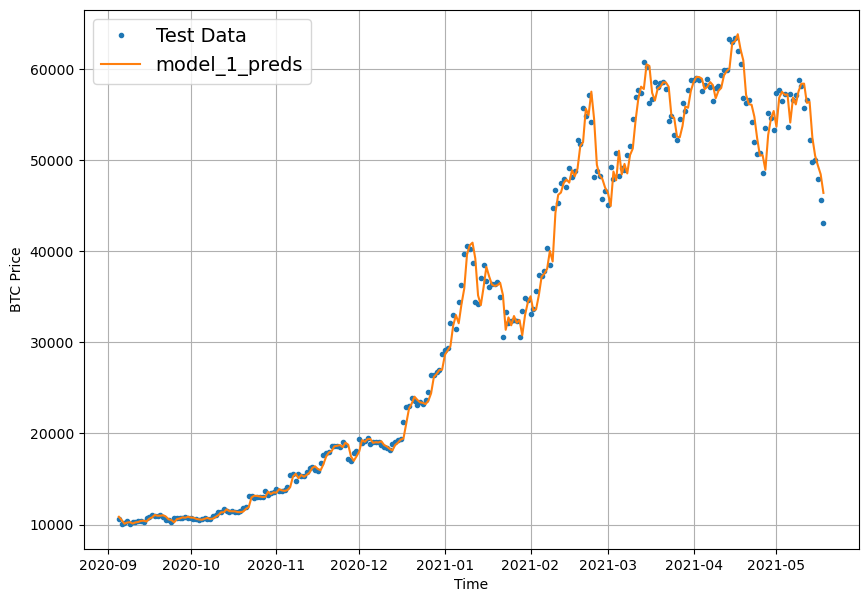

In [44]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense(window=30, horizon=1)

In [45]:
windows, labels = make_windows(prices, window_size=30, horizon=1)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)


In [46]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation='linear')
], name="model_2_dense")

model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_2 = model_2.fit(train_windows,
                             train_labels,
                             validation_data=(test_windows, test_labels),
                             epochs=100,
                             batch_size=128,
                             verbose=0,
                             callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 2653.37720, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 2: val_loss improved from 2653.37720 to 1637.70312, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 3: val_loss did not improve from 1637.70312

Epoch 4: val_loss improved from 1637.70312 to 1437.63354, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 5: val_loss improved from 1437.63354 to 1382.72119, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 6: val_loss did not improve from 1382.72119

Epoch 7: val_loss did not improve from 1382.72119

Epoch 8: val_loss did not improve from 1382.72119

Epoch 9: val_loss improved from 1382.72119 to 1186.76367, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 10: val_loss improved from 1186.76367 to 1097.54626, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 11: val_loss improved from 1097.54626 to 1046.49133, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 12: val_loss improved from 1046.49133 to 1026.79492, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 13: val_loss improved from 1026.79492 to 1011.20685, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 14: val_loss improved from 1011.20685 to 975.67084, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 15: val_loss did not improve from 975.67084

Epoch 16: val_loss did not improve from 975.67084

Epoch 17: val_loss improved from 975.67084 to 908.84070, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 18: val_loss improved from 908.84070 to 899.97961, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 19: val_loss did not improve from 899.97961

Epoch 20: val_loss did not improve from 899.97961

Epoch 21: val_loss improved from 899.97961 to 848.82141, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 22: val_loss improved from 848.82141 to 836.32147, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 23: val_loss did not improve from 836.32147

Epoch 24: val_loss did not improve from 836.32147

Epoch 25: val_loss did not improve from 836.32147

Epoch 26: val_loss improved from 836.32147 to 812.65240, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 27: val_loss did not improve from 812.65240

Epoch 28: val_loss did not improve from 812.65240

Epoch 29: val_loss improved from 812.65240 to 774.16956, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 30: val_loss did not improve from 774.16956

Epoch 31: val_loss did not improve from 774.16956

Epoch 32: val_loss improved from 774.16956 to 767.48120, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 33: val_loss improved from 767.48120 to 763.21997, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 34: val_loss improved from 763.21997 to 762.81573, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 35: val_loss improved from 762.81573 to 738.93384, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 36: val_loss did not improve from 738.93384

Epoch 37: val_loss did not improve from 738.93384

Epoch 38: val_loss did not improve from 738.93384

Epoch 39: val_loss improved from 738.93384 to 735.40802, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 40: val_loss did not improve from 735.40802

Epoch 41: val_loss improved from 735.40802 to 727.66681, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 42: val_loss did not improve from 727.66681

Epoch 43: val_loss did not improve from 727.66681

Epoch 44: val_loss improved from 727.66681 to 720.60596, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 45: val_loss did not improve from 720.60596

Epoch 46: val_loss improved from 720.60596 to 707.79993, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 47: val_loss did not improve from 707.79993

Epoch 48: val_loss improved from 707.79993 to 706.50262, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 49: val_loss improved from 706.50262 to 692.35358, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 50: val_loss did not improve from 692.35358

Epoch 51: val_loss did not improve from 692.35358

Epoch 52: val_loss did not improve from 692.35358

Epoch 53: val_loss did not improve from 692.35358

Epoch 54: val_loss did not improve from 692.35358

Epoch 55: val_loss did not improve from 692.35358

Epoch 56: val_loss did not improve from 692.35358

Epoch 57: val_loss improved from 692.35358 to 674.16388, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 58: val_loss did not improve from 674.16388

Epoch 59: val_loss did not improve from 674.16388

Epoch 60: val_loss did not improve from 674.16388

Epoch 61: val_loss improved from 674.16388 to 664.60034, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 62: val_loss did not improve from 664.60034

Epoch 63: val_loss did not improve from 664.60034

Epoch 64: val_loss improved from 664.60034 to 661.55042, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 65: val_loss did not improve from 661.55042

Epoch 66: val_loss did not improve from 661.55042

Epoch 67: val_loss did not improve from 661.55042

Epoch 68: val_loss improved from 661.55042 to 646.70618, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 69: val_loss did not improve from 646.70618

Epoch 70: val_loss did not improve from 646.70618

Epoch 71: val_loss did not improve from 646.70618

Epoch 72: val_loss improved from 646.70618 to 643.27344, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 73: val_loss did not improve from 643.27344

Epoch 74: val_loss did not improve from 643.27344

Epoch 75: val_loss did not improve from 643.27344

Epoch 76: val_loss improved from 643.27344 to 635.55768, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 77: val_loss did not improve from 635.55768

Epoch 78: val_loss did not improve from 635.55768

Epoch 79: val_loss did not improve from 635.55768

Epoch 80: val_loss did not improve from 635.55768

Epoch 81: val_loss did not improve from 635.55768

Epoch 82: val_loss improved from 635.55768 to 633.40314, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 83: val_loss did not improve from 633.40314

Epoch 84: val_loss did not improve from 633.40314

Epoch 85: val_loss did not improve from 633.40314

Epoch 86: val_loss did not improve from 633.40314

Epoch 87: val_loss improved from 633.40314 to 629.56897, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 88: val_loss did not improve from 629.56897

Epoch 89: val_loss did not improve from 629.56897

Epoch 90: val_loss did not improve from 629.56897

Epoch 91: val_loss did not improve from 629.56897

Epoch 92: val_loss did not improve from 629.56897

Epoch 93: val_loss improved from 629.56897 to 622.04639, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 94: val_loss did not improve from 622.04639

Epoch 95: val_loss did not improve from 622.04639

Epoch 96: val_loss did not improve from 622.04639

Epoch 97: val_loss did not improve from 622.04639

Epoch 98: val_loss did not improve from 622.04639

Epoch 99: val_loss did not improve from 622.04639

Epoch 100: val_loss improved from 622.04639 to 612.61835, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 612.6183 - mae: 612.6183 - mse: 1324185.2500


[612.6182861328125, 612.6182861328125, 1324185.25]

In [48]:
model_2 = tf.keras.models.load_model("model_experiemnts/model_2_dense/")

In [49]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 4ms/step


In [50]:
model_2_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)

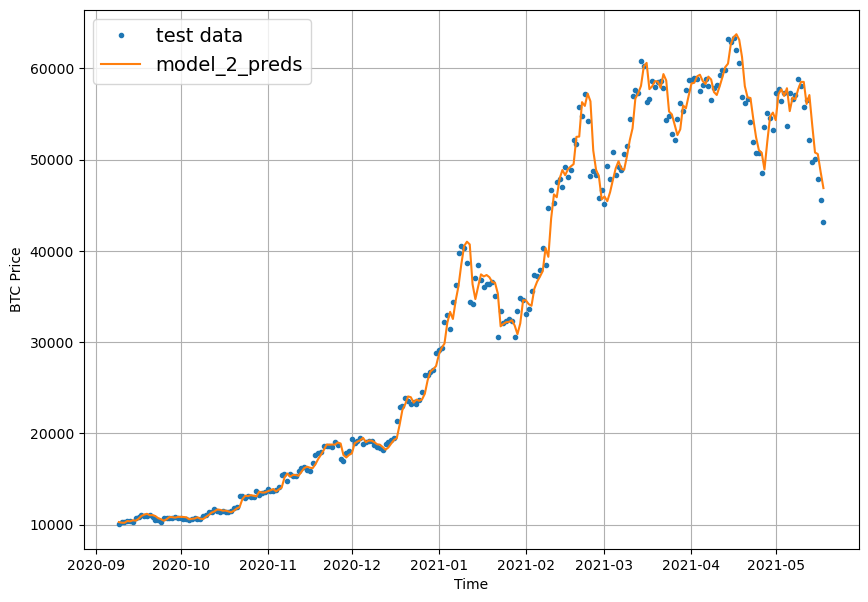

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset,format="-", label="model_2_preds")


## Model 3: Dense(window=30, horizon=7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30
windows, labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)

In [53]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_3 = model_3.fit(train_windows,
                             train_labels,
                             epochs=100,
                             batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 3713.86353, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 2: val_loss improved from 3713.86353 to 2411.49048, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 3: val_loss improved from 2411.49048 to 2201.80420, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 4: val_loss improved from 2201.80420 to 1820.89502, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 5: val_loss did not improve from 1820.89502

Epoch 6: val_loss did not improve from 1820.89502

Epoch 7: val_loss improved from 1820.89502 to 1632.54565, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 8: val_loss improved from 1632.54565 to 1558.08398, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 9: val_loss did not improve from 1558.08398

Epoch 10: val_loss improved from 1558.08398 to 1519.62585, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 11: val_loss improved from 1519.62585 to 1470.56689, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 12: val_loss did not improve from 1470.56689

Epoch 13: val_loss improved from 1470.56689 to 1440.03015, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 14: val_loss improved from 1440.03015 to 1411.31201, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 15: val_loss did not improve from 1411.31201

Epoch 16: val_loss did not improve from 1411.31201

Epoch 17: val_loss did not improve from 1411.31201

Epoch 18: val_loss did not improve from 1411.31201

Epoch 19: val_loss did not improve from 1411.31201

Epoch 20: val_loss did not improve from 1411.31201

Epoch 21: val_loss improved from 1411.31201 to 1404.99048, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 22: val_loss improved from 1404.99048 to 1396.43848, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 23: val_loss did not improve from 1396.43848

Epoch 24: val_loss improved from 1396.43848 to 1360.77527, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 25: val_loss did not improve from 1360.77527

Epoch 26: val_loss did not improve from 1360.77527

Epoch 27: val_loss did not improve from 1360.77527

Epoch 28: val_loss did not improve from 1360.77527

Epoch 29: val_loss improved from 1360.77527 to 1318.65649, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 30: val_loss did not improve from 1318.65649

Epoch 31: val_loss did not improve from 1318.65649

Epoch 32: val_loss did not improve from 1318.65649

Epoch 33: val_loss did not improve from 1318.65649

Epoch 34: val_loss did not improve from 1318.65649

Epoch 35: val_loss did not improve from 1318.65649

Epoch 36: val_loss did not improve from 1318.65649

Epoch 37: val_loss did not improve from 1318.65649

Epoch 38: val_loss improved from 1318.65649 to 1306.27173, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 39: val_loss did not improve from 1306.27173

Epoch 40: val_loss did not improve from 1306.27173

Epoch 41: val_loss did not improve from 1306.27173

Epoch 42: val_loss did not improve from 1306.27173

Epoch 43: val_loss improved from 1306.27173 to 1281.22119, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 44: val_loss did not improve from 1281.22119

Epoch 45: val_loss did not improve from 1281.22119

Epoch 46: val_loss did not improve from 1281.22119

Epoch 47: val_loss did not improve from 1281.22119

Epoch 48: val_loss did not improve from 1281.22119

Epoch 49: val_loss did not improve from 1281.22119

Epoch 50: val_loss did not improve from 1281.22119

Epoch 51: val_loss did not improve from 1281.22119

Epoch 52: val_loss did not improve from 1281.22119

Epoch 53: val_loss did not improve from 1281.22119

Epoch 54: val_loss improved from 1281.22119 to 1278.10144, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 55: val_loss improved from 1278.10144 to 1276.62329, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 56: val_loss did not improve from 1276.62329

Epoch 57: val_loss did not improve from 1276.62329

Epoch 58: val_loss did not improve from 1276.62329

Epoch 59: val_loss did not improve from 1276.62329

Epoch 60: val_loss improved from 1276.62329 to 1258.48694, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 61: val_loss did not improve from 1258.48694

Epoch 62: val_loss did not improve from 1258.48694

Epoch 63: val_loss did not improve from 1258.48694

Epoch 64: val_loss did not improve from 1258.48694

Epoch 65: val_loss did not improve from 1258.48694

Epoch 66: val_loss did not improve from 1258.48694

Epoch 67: val_loss did not improve from 1258.48694

Epoch 68: val_loss did not improve from 1258.48694

Epoch 69: val_loss did not improve from 1258.48694

Epoch 70: val_loss improved from 1258.48694 to 1250.14514, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 71: val_loss improved from 1250.14514 to 1239.96484, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 72: val_loss did not improve from 1239.96484

Epoch 73: val_loss did not improve from 1239.96484

Epoch 74: val_loss did not improve from 1239.96484

Epoch 75: val_loss did not improve from 1239.96484

Epoch 76: val_loss did not improve from 1239.96484

Epoch 77: val_loss did not improve from 1239.96484

Epoch 78: val_loss did not improve from 1239.96484

Epoch 79: val_loss did not improve from 1239.96484

Epoch 80: val_loss did not improve from 1239.96484

Epoch 81: val_loss did not improve from 1239.96484

Epoch 82: val_loss did not improve from 1239.96484

Epoch 83: val_loss did not improve from 1239.96484

Epoch 84: val_loss did not improve from 1239.96484

Epoch 85: val_loss did not improve from 1239.96484

Epoch 86: val_loss did not improve from 1239.96484

Epoch 87: val_loss did not improve from 1239.96484

Epoch 88: val_loss did not improve from 1239.96484

Epoch 89: val_loss did not improve from 1239.96484

Epoch 90: val_loss did not improve from 1239.96484

Epoch 91: v

INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 93: val_loss did not improve from 1221.35413

Epoch 94: val_loss did not improve from 1221.35413

Epoch 95: val_loss did not improve from 1221.35413

Epoch 96: val_loss did not improve from 1221.35413

Epoch 97: val_loss did not improve from 1221.35413

Epoch 98: val_loss did not improve from 1221.35413

Epoch 99: val_loss did not improve from 1221.35413

Epoch 100: val_loss did not improve from 1221.35413


In [54]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1294.1956 - mae: 1294.1956 - mse: 5613655.0000


[1294.195556640625, 1294.195556640625, 5613655.0]

In [55]:
model_3 = tf.keras.models.load_model("model_experiemnts/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1221.3540 - mae: 1221.3540 - mse: 5335022.0000


[1221.35400390625, 1221.35400390625, 5335022.0]

In [56]:
model_3_preds = make_preds(model_3, 
                          input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


## Make our evaluation function work for larger horizons

In [57]:
def evaluation_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    metrics = {}
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        mase = tf.reduce_mean(mase)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)

    metrics["mae"] = mae.numpy()
    metrics["mse"] = mse.numpy()
    metrics["mase"] = mase.numpy()
    metrics["rmse"] = rmse.numpy()
    metrics["mape"] = mape.numpy()
    

    return metrics

In [58]:
# Get moddel_3 results aggregated to single values
model_3_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_3_preds)
model_3_results

{'mae': 1221.354,
 'mse': 5335022.0,
 'mase': 2.1733308,
 'rmse': 1408.0941,
 'mape': 5.5484834}

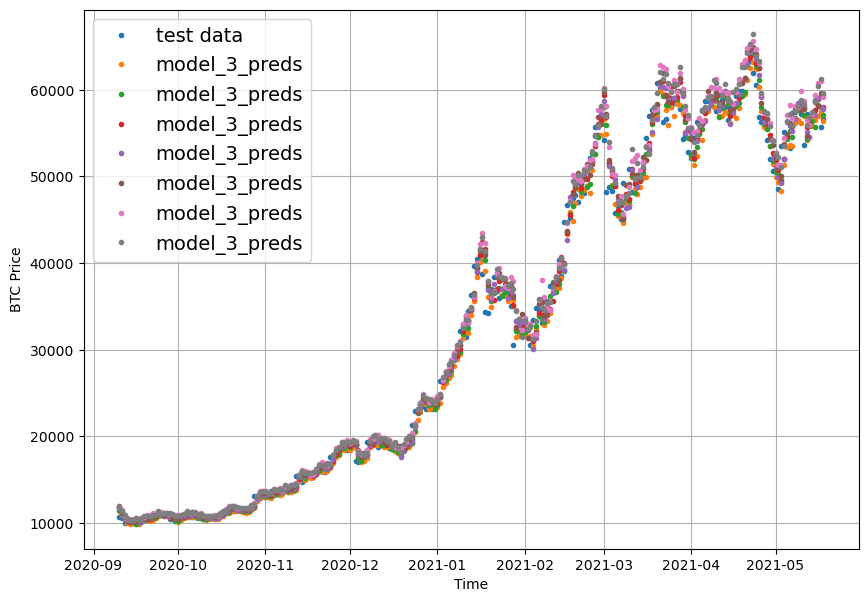

In [59]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

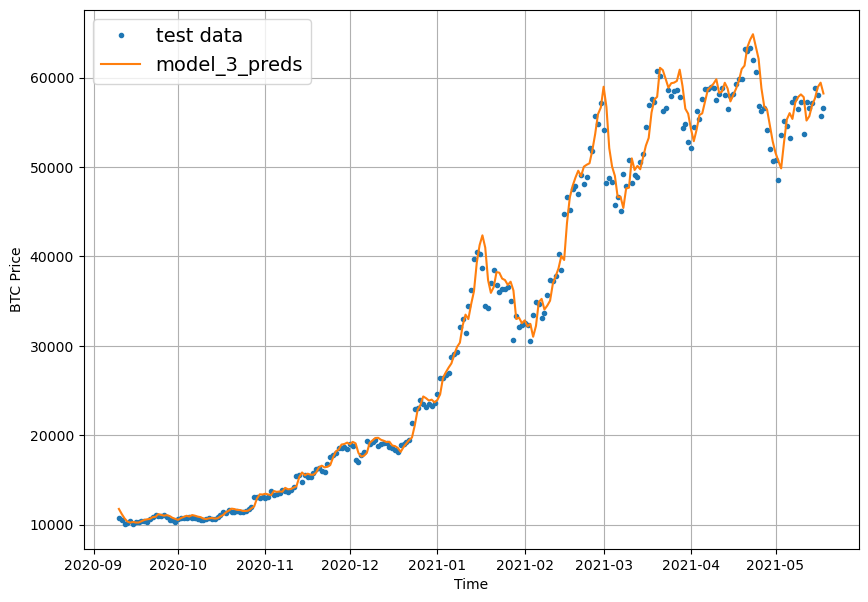

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,  label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),format="-", start=offset, label="model_3_preds")

## the best model so far

<Axes: >

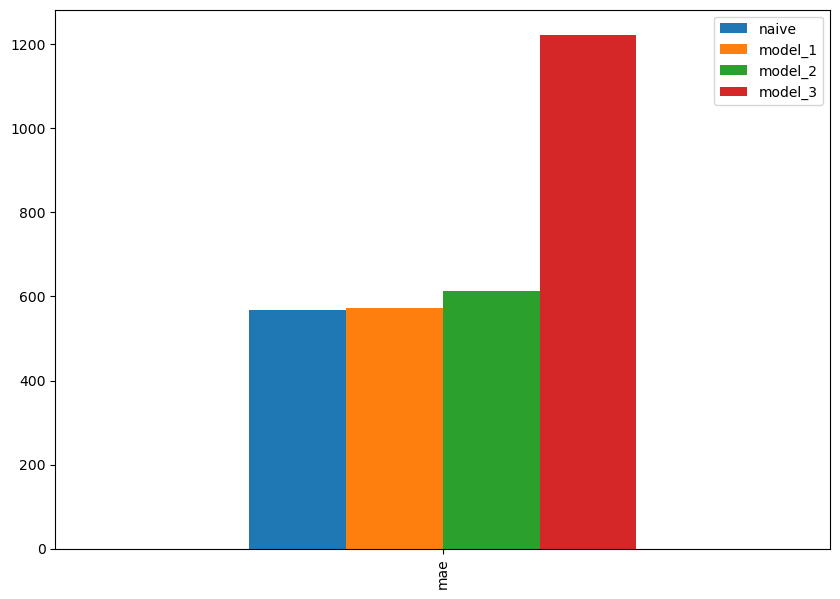

In [61]:
pd.DataFrame({"naive":naive_results["mae"],
             "model_1":model_1_results["mae"],
             "model_2":model_2_results["mae"],
             "model_3":model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [62]:
HORIZON = 1
WINDOW_SIZE = 7


In [63]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [64]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [65]:
train_windows[0].shape

(7,)

In [66]:
# before we pass our data to the conv1d layer we have to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [67]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [68]:
# Test out our lambda layer
print(f'original shape:{x.shape}')
print(f'expanded shape:{expand_dims_layer(x).shape}')
print(expand_dims_layer(x))

original shape:(7,)
expanded shape:(7, 1)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [69]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

history_model_4 = model_4.fit(train_windows, 
                             train_labels, 
                             epochs=100,
                              batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1: val_loss improved from inf to 1106.17322, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 2: val_loss did not improve from 1106.17322

Epoch 3: val_loss improved from 1106.17322 to 1088.65869, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 4: val_loss improved from 1088.65869 to 1041.75720, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 5: val_loss improved from 1041.75720 to 1030.62036, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 6: val_loss did not improve from 1030.62036

Epoch 7: val_loss improved from 1030.62036 to 1000.85138, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 8: val_loss did not improve from 1000.85138

Epoch 9: val_loss did not improve from 1000.85138

Epoch 10: val_loss improved from 1000.85138 to 964.43805, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 11: val_loss improved from 964.43805 to 946.84589, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 12: val_loss did not improve from 946.84589

Epoch 13: val_loss did not improve from 946.84589

Epoch 14: val_loss improved from 946.84589 to 925.90900, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 15: val_loss did not improve from 925.90900

Epoch 16: val_loss improved from 925.90900 to 877.73199, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 17: val_loss did not improve from 877.73199

Epoch 18: val_loss did not improve from 877.73199

Epoch 19: val_loss did not improve from 877.73199

Epoch 20: val_loss improved from 877.73199 to 858.61823, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 21: val_loss improved from 858.61823 to 812.94415, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 22: val_loss did not improve from 812.94415

Epoch 23: val_loss improved from 812.94415 to 803.82452, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 24: val_loss improved from 803.82452 to 797.51251, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 25: val_loss improved from 797.51251 to 774.50989, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 26: val_loss improved from 774.50989 to 752.68988, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 27: val_loss improved from 752.68988 to 741.26624, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 28: val_loss improved from 741.26624 to 733.68018, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 29: val_loss improved from 733.68018 to 724.65686, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 30: val_loss did not improve from 724.65686

Epoch 31: val_loss did not improve from 724.65686

Epoch 32: val_loss improved from 724.65686 to 720.44751, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 33: val_loss improved from 720.44751 to 695.12952, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 34: val_loss improved from 695.12952 to 692.86902, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 35: val_loss did not improve from 692.86902

Epoch 36: val_loss did not improve from 692.86902

Epoch 37: val_loss improved from 692.86902 to 680.46490, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 38: val_loss improved from 680.46490 to 664.13672, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 39: val_loss did not improve from 664.13672

Epoch 40: val_loss improved from 664.13672 to 656.38599, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 41: val_loss improved from 656.38599 to 651.26331, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 42: val_loss did not improve from 651.26331

Epoch 43: val_loss improved from 651.26331 to 649.22791, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 44: val_loss did not improve from 649.22791

Epoch 45: val_loss improved from 649.22791 to 648.12415, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 46: val_loss improved from 648.12415 to 635.12036, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 47: val_loss did not improve from 635.12036

Epoch 48: val_loss did not improve from 635.12036

Epoch 49: val_loss improved from 635.12036 to 625.69751, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 50: val_loss did not improve from 625.69751

Epoch 51: val_loss improved from 625.69751 to 624.19403, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 52: val_loss did not improve from 624.19403

Epoch 53: val_loss did not improve from 624.19403

Epoch 54: val_loss did not improve from 624.19403

Epoch 55: val_loss improved from 624.19403 to 609.44659, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 56: val_loss did not improve from 609.44659

Epoch 57: val_loss improved from 609.44659 to 605.83844, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 58: val_loss did not improve from 605.83844

Epoch 59: val_loss did not improve from 605.83844

Epoch 60: val_loss did not improve from 605.83844

Epoch 61: val_loss did not improve from 605.83844

Epoch 62: val_loss improved from 605.83844 to 602.77167, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 63: val_loss did not improve from 602.77167

Epoch 64: val_loss did not improve from 602.77167

Epoch 65: val_loss improved from 602.77167 to 597.54254, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 66: val_loss improved from 597.54254 to 592.84387, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 67: val_loss did not improve from 592.84387

Epoch 68: val_loss did not improve from 592.84387

Epoch 69: val_loss did not improve from 592.84387

Epoch 70: val_loss improved from 592.84387 to 591.49133, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 71: val_loss did not improve from 591.49133

Epoch 72: val_loss did not improve from 591.49133

Epoch 73: val_loss did not improve from 591.49133

Epoch 74: val_loss improved from 591.49133 to 585.93219, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 75: val_loss did not improve from 585.93219

Epoch 76: val_loss did not improve from 585.93219

Epoch 77: val_loss improved from 585.93219 to 583.92816, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 78: val_loss improved from 583.92816 to 582.79865, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 79: val_loss did not improve from 582.79865

Epoch 80: val_loss did not improve from 582.79865

Epoch 81: val_loss improved from 582.79865 to 580.81665, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 82: val_loss improved from 580.81665 to 580.56146, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 83: val_loss did not improve from 580.56146

Epoch 84: val_loss did not improve from 580.56146

Epoch 85: val_loss did not improve from 580.56146

Epoch 86: val_loss did not improve from 580.56146

Epoch 87: val_loss improved from 580.56146 to 577.72876, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 88: val_loss did not improve from 577.72876

Epoch 89: val_loss did not improve from 577.72876

Epoch 90: val_loss did not improve from 577.72876

Epoch 91: val_loss did not improve from 577.72876

Epoch 92: val_loss did not improve from 577.72876

Epoch 93: val_loss did not improve from 577.72876

Epoch 94: val_loss did not improve from 577.72876

Epoch 95: val_loss did not improve from 577.72876

Epoch 96: val_loss did not improve from 577.72876

Epoch 97: val_loss improved from 577.72876 to 575.44257, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 98: val_loss did not improve from 575.44257

Epoch 99: val_loss improved from 575.44257 to 573.63531, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 100: val_loss did not improve from 573.63531


In [70]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 627.2184


627.2183837890625

In [72]:
model_4 = tf.keras.models.load_model("model_experiemnts/model_4")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.6353


573.6353149414062

In [73]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8910.647, 8793.376, 9007.591, 8805.72 , 8739.815, 8745.315,
       8703.384, 8530.55 , 8476.573, 8524.694], dtype=float32)>

In [74]:
model_4_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_4_preds)
model_4_results

{'mae': 573.6353,
 'mse': 1194190.5,
 'mase': 1.0077183,
 'rmse': 1092.7903,
 'mape': 2.564438}

In [75]:
model_1_results

{'mae': 571.38635,
 'mse': 1172115.4,
 'mase': 1.0037676,
 'rmse': 1082.6428,
 'mape': 2.5668318}

## Model 5: RNN(LSTM)

In [76]:
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE,))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1))(inputs)
# x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name="model_5")
model_5.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())
model_5.fit(train_windows,
           train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1786.3625
Epoch 1: val_loss improved from inf to 4125.35596, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 5s 166ms/step - loss: 1763.6791 - val_loss: 4125.3560
Epoch 2/100
 8/18 [============>.................] - ETA: 0s - loss: 292.4585
Epoch 2: val_loss improved from 4125.35596 to 952.39862, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 178ms/step - loss: 258.7117 - val_loss: 952.3986
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 178.7231
Epoch 3: val_loss did not improve from 952.39862
18/18 [==============================] - 0s 8ms/step - loss: 177.5055 - val_loss: 1412.9827
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 187.1650
Epoch 4: val_loss did not improve from 952.39862
18/18 [==============================] - 0s 9ms/step - loss: 186.6345 - val_loss: 987.4398
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 181.6239
Epoch 5: val_loss did not improve from 952.39862
18/18 [==============================] - 0s 9ms/step - loss: 182.2482 - val_loss: 987.6516
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 174.0788
Epoch 6: val_loss did not improve from 952.39862
18/18 [==============================] - 0s 10ms/step - loss: 174.5812 - val_loss: 973.4312
Epoch 7/100
14/18 [==============

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 165ms/step - loss: 170.4252 - val_loss: 947.0541
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 166.2595
Epoch 8: val_loss did not improve from 947.05408
18/18 [==============================] - 0s 10ms/step - loss: 167.1507 - val_loss: 947.1513
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 165.2576
Epoch 9: val_loss improved from 947.05408 to 942.86420, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 166ms/step - loss: 165.2389 - val_loss: 942.8642
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 157.5472
Epoch 10: val_loss improved from 942.86420 to 907.79700, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 179ms/step - loss: 162.1333 - val_loss: 907.7970
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 160.1741
Epoch 11: val_loss improved from 907.79700 to 891.97064, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 165ms/step - loss: 159.4020 - val_loss: 891.9706
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 157.8018
Epoch 12: val_loss did not improve from 891.97064
18/18 [==============================] - 0s 9ms/step - loss: 157.8018 - val_loss: 939.1094
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 156.1622
Epoch 13: val_loss did not improve from 891.97064
18/18 [==============================] - 0s 9ms/step - loss: 155.7243 - val_loss: 896.5927
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 150.5175
Epoch 14: val_loss improved from 891.97064 to 889.33856, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 212ms/step - loss: 152.1975 - val_loss: 889.3386
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 150.5952
Epoch 15: val_loss improved from 889.33856 to 774.89062, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 171ms/step - loss: 152.1311 - val_loss: 774.8906
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 151.8468
Epoch 16: val_loss did not improve from 774.89062
18/18 [==============================] - 0s 10ms/step - loss: 150.2288 - val_loss: 915.0489
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 149.5710
Epoch 17: val_loss did not improve from 774.89062
18/18 [==============================] - 0s 9ms/step - loss: 149.6340 - val_loss: 819.3115
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 149.2918
Epoch 18: val_loss did not improve from 774.89062
18/18 [==============================] - 0s 14ms/step - loss: 144.7393 - val_loss: 876.7029
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 143.5008
Epoch 19: val_loss did not improve from 774.89062
18/18 [==============================] - 0s 10ms/step - loss: 142.6993 - val_loss: 805.5686
Epoch 20/100
18/18 [====

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 122ms/step - loss: 140.8698 - val_loss: 760.6012
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 132.8678
Epoch 23: val_loss did not improve from 760.60120
18/18 [==============================] - 0s 9ms/step - loss: 133.5309 - val_loss: 773.5254
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 136.4822
Epoch 24: val_loss improved from 760.60120 to 743.95483, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 222ms/step - loss: 136.3246 - val_loss: 743.9548
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 139.4716
Epoch 25: val_loss did not improve from 743.95483
18/18 [==============================] - 0s 13ms/step - loss: 135.2974 - val_loss: 747.7517
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 131.2130
Epoch 26: val_loss improved from 743.95483 to 728.09094, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 247ms/step - loss: 130.8047 - val_loss: 728.0909
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 131.5883
Epoch 27: val_loss improved from 728.09094 to 710.71930, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 204ms/step - loss: 131.0508 - val_loss: 710.7193
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 130.5057
Epoch 28: val_loss did not improve from 710.71930
18/18 [==============================] - 0s 12ms/step - loss: 132.5451 - val_loss: 761.8849
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 127.2923
Epoch 29: val_loss did not improve from 710.71930
18/18 [==============================] - 0s 10ms/step - loss: 129.6683 - val_loss: 716.7868
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 128.4586
Epoch 30: val_loss did not improve from 710.71930
18/18 [==============================] - 0s 12ms/step - loss: 130.6478 - val_loss: 814.9710
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 131.3706
Epoch 31: val_loss improved from 710.71930 to 700.20178, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\asset

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 211ms/step - loss: 133.8229 - val_loss: 700.2018
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 125.9895
Epoch 32: val_loss improved from 700.20178 to 695.26349, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 169ms/step - loss: 127.7611 - val_loss: 695.2635
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 128.4544
Epoch 33: val_loss improved from 695.26349 to 693.33362, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 142ms/step - loss: 127.0481 - val_loss: 693.3336
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 124.4823
Epoch 34: val_loss improved from 693.33362 to 684.33997, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 161ms/step - loss: 124.3685 - val_loss: 684.3400
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 123.5831
Epoch 35: val_loss improved from 684.33997 to 682.97601, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 167ms/step - loss: 123.4208 - val_loss: 682.9760
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 128.6597
Epoch 36: val_loss improved from 682.97601 to 675.46875, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 168ms/step - loss: 128.6597 - val_loss: 675.4688
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6070
Epoch 37: val_loss improved from 675.46875 to 667.34161, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 185ms/step - loss: 122.5175 - val_loss: 667.3416
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 125.6535
Epoch 38: val_loss improved from 667.34161 to 667.14490, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 165ms/step - loss: 122.1753 - val_loss: 667.1449
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 125.9972
Epoch 39: val_loss did not improve from 667.14490
18/18 [==============================] - 0s 10ms/step - loss: 122.0832 - val_loss: 674.0452
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 120.1782
Epoch 40: val_loss improved from 667.14490 to 661.78320, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 163ms/step - loss: 119.9854 - val_loss: 661.7832
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 122.1314
Epoch 41: val_loss did not improve from 661.78320
18/18 [==============================] - 0s 10ms/step - loss: 120.4144 - val_loss: 672.2137
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 117.4712
Epoch 42: val_loss improved from 661.78320 to 652.30634, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 168ms/step - loss: 120.3805 - val_loss: 652.3063
Epoch 43/100
15/18 [========================>.....] - ETA: 0s - loss: 118.5213
Epoch 43: val_loss improved from 652.30634 to 641.52344, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 167ms/step - loss: 118.9607 - val_loss: 641.5234
Epoch 44/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.7740
Epoch 44: val_loss did not improve from 641.52344
18/18 [==============================] - 0s 9ms/step - loss: 118.1744 - val_loss: 641.6877
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 116.3086
Epoch 45: val_loss did not improve from 641.52344
18/18 [==============================] - 0s 10ms/step - loss: 117.4538 - val_loss: 644.5288
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 119.9169
Epoch 46: val_loss improved from 641.52344 to 632.39813, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 187ms/step - loss: 119.0977 - val_loss: 632.3981
Epoch 47/100
16/18 [=========================>....] - ETA: 0s - loss: 117.7358
Epoch 47: val_loss improved from 632.39813 to 629.69446, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 156ms/step - loss: 121.4987 - val_loss: 629.6945
Epoch 48/100
 9/18 [==============>...............] - ETA: 0s - loss: 116.2379
Epoch 48: val_loss did not improve from 629.69446
18/18 [==============================] - 0s 8ms/step - loss: 118.7306 - val_loss: 633.7674
Epoch 49/100
10/18 [===============>..............] - ETA: 0s - loss: 124.1973
Epoch 49: val_loss did not improve from 629.69446
18/18 [==============================] - 0s 8ms/step - loss: 115.6801 - val_loss: 631.3265
Epoch 50/100
11/18 [=================>............] - ETA: 0s - loss: 117.3157
Epoch 50: val_loss improved from 629.69446 to 622.66083, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 142ms/step - loss: 119.3557 - val_loss: 622.6608
Epoch 51/100
11/18 [=================>............] - ETA: 0s - loss: 111.7155
Epoch 51: val_loss did not improve from 622.66083
18/18 [==============================] - 0s 8ms/step - loss: 114.4236 - val_loss: 645.5805
Epoch 52/100
13/18 [====================>.........] - ETA: 0s - loss: 122.6902
Epoch 52: val_loss improved from 622.66083 to 614.83069, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 165ms/step - loss: 115.7422 - val_loss: 614.8307
Epoch 53/100
10/18 [===============>..............] - ETA: 0s - loss: 113.1389
Epoch 53: val_loss improved from 614.83069 to 612.94983, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 161ms/step - loss: 115.9135 - val_loss: 612.9498
Epoch 54/100
10/18 [===============>..............] - ETA: 0s - loss: 112.2916
Epoch 54: val_loss did not improve from 612.94983
18/18 [==============================] - 0s 9ms/step - loss: 114.4025 - val_loss: 649.8516
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 114.9654
Epoch 55: val_loss improved from 612.94983 to 607.98975, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 178ms/step - loss: 114.9654 - val_loss: 607.9897
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 117.8719
Epoch 56: val_loss did not improve from 607.98975
18/18 [==============================] - 0s 8ms/step - loss: 119.4350 - val_loss: 649.2269
Epoch 57/100
10/18 [===============>..............] - ETA: 0s - loss: 129.2715
Epoch 57: val_loss did not improve from 607.98975
18/18 [==============================] - 0s 9ms/step - loss: 125.9772 - val_loss: 619.9072
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 114.1428
Epoch 58: val_loss improved from 607.98975 to 603.76697, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 172ms/step - loss: 114.1428 - val_loss: 603.7670
Epoch 59/100
10/18 [===============>..............] - ETA: 0s - loss: 109.9080
Epoch 59: val_loss did not improve from 603.76697
18/18 [==============================] - 0s 9ms/step - loss: 112.6386 - val_loss: 606.3785
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 111.5444
Epoch 60: val_loss did not improve from 603.76697
18/18 [==============================] - 0s 9ms/step - loss: 112.7910 - val_loss: 605.8223
Epoch 61/100
11/18 [=================>............] - ETA: 0s - loss: 105.2167
Epoch 61: val_loss did not improve from 603.76697
18/18 [==============================] - 0s 8ms/step - loss: 112.4509 - val_loss: 619.2432
Epoch 62/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6590
Epoch 62: val_loss improved from 603.76697 to 597.43170, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 207ms/step - loss: 112.2164 - val_loss: 597.4317
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 115.5292
Epoch 63: val_loss improved from 597.43170 to 596.77374, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 193ms/step - loss: 112.6669 - val_loss: 596.7737
Epoch 64/100
10/18 [===============>..............] - ETA: 0s - loss: 119.1464
Epoch 64: val_loss did not improve from 596.77374
18/18 [==============================] - 0s 9ms/step - loss: 112.0827 - val_loss: 659.1773
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 116.9280
Epoch 65: val_loss did not improve from 596.77374
18/18 [==============================] - 0s 9ms/step - loss: 116.9280 - val_loss: 626.9792
Epoch 66/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1661
Epoch 66: val_loss did not improve from 596.77374
18/18 [==============================] - 0s 12ms/step - loss: 112.2216 - val_loss: 615.0250
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 112.2028
Epoch 67: val_loss did not improve from 596.77374
18/18 [==============================] - 0s 27ms/step - loss: 114.1336 - val_loss: 616.9567
Epoch 68/100
13/18 [=====

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 125ms/step - loss: 110.5778 - val_loss: 586.7423
Epoch 73/100
10/18 [===============>..............] - ETA: 0s - loss: 114.3855
Epoch 73: val_loss did not improve from 586.74231
18/18 [==============================] - 0s 7ms/step - loss: 110.6816 - val_loss: 589.6982
Epoch 74/100
10/18 [===============>..............] - ETA: 0s - loss: 112.0538
Epoch 74: val_loss did not improve from 586.74231
18/18 [==============================] - 0s 8ms/step - loss: 110.5372 - val_loss: 589.5629
Epoch 75/100
13/18 [====================>.........] - ETA: 0s - loss: 108.1825
Epoch 75: val_loss did not improve from 586.74231
18/18 [==============================] - 0s 7ms/step - loss: 109.8622 - val_loss: 612.5281
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 110.2296
Epoch 76: val_loss did not improve from 586.74231
18/18 [==============================] - 0s 8ms/step - loss: 110.8726 - val_loss: 594.3144
Epoch 77/100
11/18 [=======

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 147ms/step - loss: 110.4990 - val_loss: 584.3487
Epoch 80/100
11/18 [=================>............] - ETA: 0s - loss: 114.1807
Epoch 80: val_loss did not improve from 584.34869
18/18 [==============================] - 0s 8ms/step - loss: 116.0869 - val_loss: 713.5359
Epoch 81/100
11/18 [=================>............] - ETA: 0s - loss: 116.3035
Epoch 81: val_loss did not improve from 584.34869
18/18 [==============================] - 0s 8ms/step - loss: 113.9255 - val_loss: 644.2129
Epoch 82/100
 9/18 [==============>...............] - ETA: 0s - loss: 121.3926
Epoch 82: val_loss improved from 584.34869 to 580.66833, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 161ms/step - loss: 114.1612 - val_loss: 580.6683
Epoch 83/100
10/18 [===============>..............] - ETA: 0s - loss: 111.4749
Epoch 83: val_loss did not improve from 580.66833
18/18 [==============================] - 0s 8ms/step - loss: 110.5487 - val_loss: 617.4186
Epoch 84/100
12/18 [===================>..........] - ETA: 0s - loss: 107.8952
Epoch 84: val_loss improved from 580.66833 to 578.34839, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 210ms/step - loss: 110.5344 - val_loss: 578.3484
Epoch 85/100
11/18 [=================>............] - ETA: 0s - loss: 104.5652
Epoch 85: val_loss did not improve from 578.34839
18/18 [==============================] - 0s 9ms/step - loss: 108.7631 - val_loss: 602.9377
Epoch 86/100
16/18 [=========================>....] - ETA: 0s - loss: 108.9774
Epoch 86: val_loss did not improve from 578.34839
18/18 [==============================] - 0s 10ms/step - loss: 109.9418 - val_loss: 661.1396
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 118.8478
Epoch 87: val_loss did not improve from 578.34839
18/18 [==============================] - 0s 18ms/step - loss: 114.5089 - val_loss: 579.6762
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 113.4613
Epoch 88: val_loss did not improve from 578.34839
18/18 [==============================] - 0s 18ms/step - loss: 109.6862 - val_loss: 584.6722
Epoch 89/100
14/18 [====

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 149ms/step - loss: 108.4324 - val_loss: 573.8649
Epoch 95/100
18/18 [==============================] - ETA: 0s - loss: 108.5623
Epoch 95: val_loss did not improve from 573.86487
18/18 [==============================] - 0s 10ms/step - loss: 108.5623 - val_loss: 579.4754
Epoch 96/100
10/18 [===============>..............] - ETA: 0s - loss: 109.1926
Epoch 96: val_loss did not improve from 573.86487
18/18 [==============================] - 0s 11ms/step - loss: 108.7742 - val_loss: 576.4045
Epoch 97/100
17/18 [===========================>..] - ETA: 0s - loss: 106.4997
Epoch 97: val_loss did not improve from 573.86487
18/18 [==============================] - 0s 11ms/step - loss: 108.0890 - val_loss: 603.2975
Epoch 98/100
16/18 [=========================>....] - ETA: 0s - loss: 109.7920
Epoch 98: val_loss did not improve from 573.86487
18/18 [==============================] - 0s 13ms/step - loss: 108.4396 - val_loss: 578.8062
Epoch 99/100
13/18 [===

In [77]:
model_5 = tf.keras.models.load_model("model_experiemnts/model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 573.8649


573.8648681640625

In [78]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_5_preds)
model_5_results

18/18 [==============================] - 0s 4ms/step


{'mae': 573.86487,
 'mse': 1192028.2,
 'mase': 1.0081216,
 'rmse': 1091.8004,
 'mape': 2.5734034}

## Make a multivariate time series dataset

bitcoin halving events

In [79]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [80]:
# Add bitcoin halving to our dataset
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

# block rewarddd dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [81]:
block_reward_2_days = (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [82]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [83]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

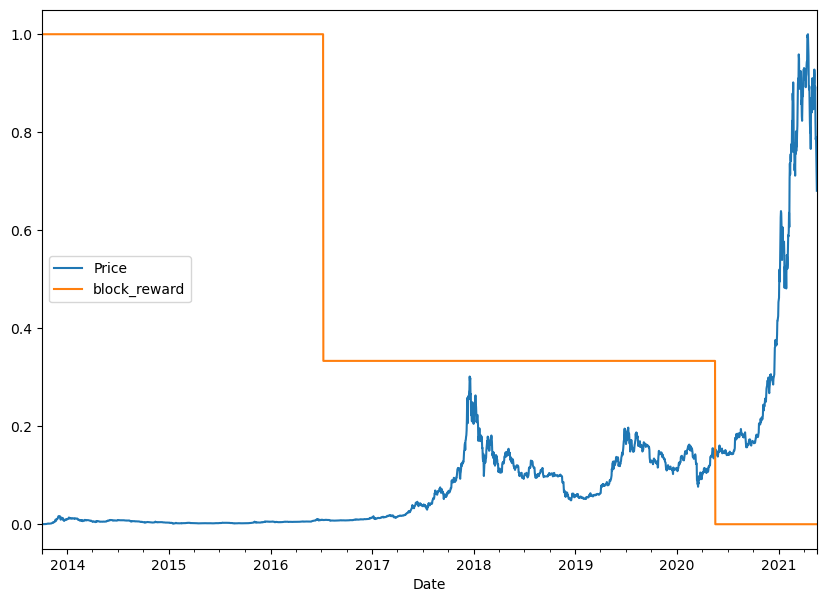

In [84]:
#plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                    columns=bitcoin_prices_block.columns,
                                    index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

In [85]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
    
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [86]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5)

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [87]:
y.head(5)

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [88]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [89]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_6")

model_6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(X_test, y_test),
           verbose=1,
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1768.8009 
Epoch 1: val_loss improved from inf to 1867.10522, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 2s 57ms/step - loss: 1768.8009 - val_loss: 1867.1052
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 454.7296
Epoch 2: val_loss did not improve from 1867.10522
18/18 [==============================] - 0s 8ms/step - loss: 400.0519 - val_loss: 2065.5552
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 245.6374
Epoch 3: val_loss improved from 1867.10522 to 1283.98376, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 50ms/step - loss: 236.6344 - val_loss: 1283.9838
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 194.1193
Epoch 4: val_loss improved from 1283.98376 to 1091.09021, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 69ms/step - loss: 192.0473 - val_loss: 1091.0902
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1867
Epoch 5: val_loss improved from 1091.09021 to 989.08771, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 181.2050 - val_loss: 989.0877
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 175.2565
Epoch 6: val_loss improved from 989.08771 to 973.24451, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 43ms/step - loss: 175.2565 - val_loss: 973.2445
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 172.9168
Epoch 7: val_loss improved from 973.24451 to 953.11859, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 66ms/step - loss: 167.7796 - val_loss: 953.1186
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 143.6529
Epoch 8: val_loss improved from 953.11859 to 861.87097, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 39ms/step - loss: 158.5584 - val_loss: 861.8710
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 156.9571
Epoch 9: val_loss did not improve from 861.87097
18/18 [==============================] - 0s 6ms/step - loss: 153.7729 - val_loss: 869.7582
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 163.1515
Epoch 10: val_loss improved from 861.87097 to 796.21185, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 60ms/step - loss: 146.4707 - val_loss: 796.2119
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 140.4054
Epoch 11: val_loss improved from 796.21185 to 776.79865, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 37ms/step - loss: 139.9243 - val_loss: 776.7986
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 135.4402
Epoch 12: val_loss did not improve from 776.79865
18/18 [==============================] - 0s 6ms/step - loss: 135.4402 - val_loss: 787.7791
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 109.6084
Epoch 13: val_loss did not improve from 776.79865
18/18 [==============================] - 0s 5ms/step - loss: 135.0613 - val_loss: 800.8087
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0904
Epoch 14: val_loss improved from 776.79865 to 744.52216, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 129.2426 - val_loss: 744.5222
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3158
Epoch 15: val_loss improved from 744.52216 to 701.76733, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 36ms/step - loss: 129.1583 - val_loss: 701.7673
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 122.8008
Epoch 16: val_loss did not improve from 701.76733
18/18 [==============================] - 0s 18ms/step - loss: 124.8399 - val_loss: 741.4792
Epoch 17/100
 8/18 [============>.................] - ETA: 0s - loss: 129.9042
Epoch 17: val_loss did not improve from 701.76733
18/18 [==============================] - 0s 11ms/step - loss: 121.6627 - val_loss: 705.0391
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 120.4838
Epoch 18: val_loss improved from 701.76733 to 647.40369, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 46ms/step - loss: 120.4838 - val_loss: 647.4037
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 119.6497
Epoch 19: val_loss did not improve from 647.40369
18/18 [==============================] - 0s 6ms/step - loss: 118.9145 - val_loss: 683.7155
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 117.3889
Epoch 20: val_loss did not improve from 647.40369
18/18 [==============================] - 0s 6ms/step - loss: 117.3746 - val_loss: 664.4691
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 121.6499
Epoch 21: val_loss improved from 647.40369 to 642.00604, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 65ms/step - loss: 121.8922 - val_loss: 642.0060
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 114.3410
Epoch 22: val_loss improved from 642.00604 to 614.59497, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 40ms/step - loss: 114.3410 - val_loss: 614.5950
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 114.5913
Epoch 23: val_loss improved from 614.59497 to 612.37738, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 39ms/step - loss: 114.5913 - val_loss: 612.3774
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 115.1562
Epoch 24: val_loss did not improve from 612.37738
18/18 [==============================] - 0s 6ms/step - loss: 113.5183 - val_loss: 634.2336
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 112.5776
Epoch 25: val_loss improved from 612.37738 to 606.04749, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 83ms/step - loss: 112.1910 - val_loss: 606.0475
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 112.9948
Epoch 26: val_loss improved from 606.04749 to 595.86310, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 112.9948 - val_loss: 595.8631
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 113.4073
Epoch 27: val_loss improved from 595.86310 to 593.84283, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 71ms/step - loss: 113.5417 - val_loss: 593.8428
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 108.9720
Epoch 28: val_loss did not improve from 593.84283
18/18 [==============================] - 0s 6ms/step - loss: 110.2735 - val_loss: 593.9753
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 109.2441
Epoch 29: val_loss improved from 593.84283 to 593.77325, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 110.3208 - val_loss: 593.7733
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 116.6051
Epoch 30: val_loss improved from 593.77325 to 588.38464, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 117.0297 - val_loss: 588.3846
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 108.5854
Epoch 31: val_loss did not improve from 588.38464
18/18 [==============================] - 0s 6ms/step - loss: 109.5539 - val_loss: 650.5646
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 115.8164
Epoch 32: val_loss did not improve from 588.38464
18/18 [==============================] - 0s 7ms/step - loss: 112.6128 - val_loss: 596.7103
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 143.1975
Epoch 33: val_loss did not improve from 588.38464
18/18 [==============================] - 0s 5ms/step - loss: 112.6730 - val_loss: 602.8065
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 108.9110
Epoch 34: val_loss did not improve from 588.38464
18/18 [==============================] - 0s 16ms/step - loss: 109.7017 - val_loss: 594.3094
Epoch 35/100
18/18 [=======

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 49ms/step - loss: 111.0325 - val_loss: 575.3705
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6592
Epoch 37: val_loss did not improve from 575.37048
18/18 [==============================] - 0s 5ms/step - loss: 108.4187 - val_loss: 576.8516
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 110.3613
Epoch 38: val_loss did not improve from 575.37048
18/18 [==============================] - 0s 7ms/step - loss: 109.8943 - val_loss: 589.0635
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4803
Epoch 39: val_loss improved from 575.37048 to 574.76422, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 39ms/step - loss: 109.1773 - val_loss: 574.7642
Epoch 40/100
13/18 [====================>.........] - ETA: 0s - loss: 109.0384
Epoch 40: val_loss did not improve from 574.76422
18/18 [==============================] - 0s 8ms/step - loss: 107.4001 - val_loss: 577.2810
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 111.1114
Epoch 41: val_loss did not improve from 574.76422
18/18 [==============================] - 0s 7ms/step - loss: 107.5907 - val_loss: 629.1732
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 114.6079
Epoch 42: val_loss did not improve from 574.76422
18/18 [==============================] - 0s 7ms/step - loss: 113.6552 - val_loss: 626.7641
Epoch 43/100
15/18 [========================>.....] - ETA: 0s - loss: 111.6651
Epoch 43: val_loss did not improve from 574.76422
18/18 [==============================] - 0s 18ms/step - loss: 111.2596 - val_loss: 643.1370
Epoch 44/100
11/18 [=======

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 59ms/step - loss: 107.0484 - val_loss: 573.5142
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 109.0571
Epoch 46: val_loss did not improve from 573.51422
18/18 [==============================] - 0s 6ms/step - loss: 109.5290 - val_loss: 610.0469
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 110.7699
Epoch 47: val_loss did not improve from 573.51422
18/18 [==============================] - 0s 6ms/step - loss: 110.2858 - val_loss: 579.0778
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 106.9745
Epoch 48: val_loss did not improve from 573.51422
18/18 [==============================] - 0s 7ms/step - loss: 108.0522 - val_loss: 630.6166
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 115.3792
Epoch 49: val_loss did not improve from 573.51422
18/18 [==============================] - 0s 7ms/step - loss: 115.0631 - val_loss: 574.2299
Epoch 50/100
14/18 [========

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 69ms/step - loss: 112.9969 - val_loss: 568.7273
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 115.4973
Epoch 55: val_loss did not improve from 568.72729
18/18 [==============================] - 0s 7ms/step - loss: 111.7960 - val_loss: 583.3761
Epoch 56/100
17/18 [===========================>..] - ETA: 0s - loss: 110.1797
Epoch 56: val_loss did not improve from 568.72729
18/18 [==============================] - 0s 6ms/step - loss: 110.1933 - val_loss: 809.2104
Epoch 57/100
14/18 [======================>.......] - ETA: 0s - loss: 132.0734
Epoch 57: val_loss did not improve from 568.72729
18/18 [==============================] - 0s 7ms/step - loss: 132.8723 - val_loss: 742.0106
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 118.4365
Epoch 58: val_loss did not improve from 568.72729
18/18 [==============================] - 0s 6ms/step - loss: 118.7312 - val_loss: 607.3654
Epoch 59/100
13/18 [========

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 64ms/step - loss: 108.5716 - val_loss: 564.3648
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 68.3259
Epoch 62: val_loss did not improve from 564.36481
18/18 [==============================] - 0s 5ms/step - loss: 106.5964 - val_loss: 571.5502
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 90.6899
Epoch 63: val_loss did not improve from 564.36481
18/18 [==============================] - 0s 5ms/step - loss: 110.0583 - val_loss: 653.8961
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 95.7075
Epoch 64: val_loss did not improve from 564.36481
18/18 [==============================] - 0s 5ms/step - loss: 109.0251 - val_loss: 583.1340
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 129.1882
Epoch 65: val_loss did not improve from 564.36481
18/18 [==============================] - 0s 5ms/step - loss: 107.0425 - val_loss: 566.0565
Epoch 66/100
 1/18 [>..........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 37ms/step - loss: 106.9617 - val_loss: 563.0728
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 160.1396
Epoch 74: val_loss did not improve from 563.07275
18/18 [==============================] - 0s 5ms/step - loss: 107.4434 - val_loss: 568.8474
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 123.8935
Epoch 75: val_loss did not improve from 563.07275
18/18 [==============================] - 0s 6ms/step - loss: 107.3703 - val_loss: 613.6133
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 82.5342
Epoch 76: val_loss improved from 563.07275 to 561.96637, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 60ms/step - loss: 109.2669 - val_loss: 561.9664
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 81.5614
Epoch 77: val_loss did not improve from 561.96637
18/18 [==============================] - 0s 5ms/step - loss: 105.7232 - val_loss: 568.0602
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 99.9856
Epoch 78: val_loss did not improve from 561.96637
18/18 [==============================] - 0s 5ms/step - loss: 106.7972 - val_loss: 588.6132
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 107.8801
Epoch 79: val_loss did not improve from 561.96637
18/18 [==============================] - 0s 5ms/step - loss: 106.9005 - val_loss: 592.7092
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 114.6300
Epoch 80: val_loss did not improve from 561.96637
18/18 [==============================] - 0s 5ms/step - loss: 107.6961 - val_loss: 585.7737
Epoch 81/100
 1/18 [>.........

In [90]:
model_6 = tf.keras.models.load_model("model_experiemnts/model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 561.9664


561.9664306640625

In [91]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8841.047, 8781.404, 9020.057, 8774.338, 8745.18 ], dtype=float32)>

In [92]:
model_6_results = evaluation_preds(y_true=tf.squeeze(y_test),
                                  y_pred=model_6_preds)
model_6_results

{'mae': 561.9665,
 'mse': 1152777.2,
 'mase': 0.98721945,
 'rmse': 1073.6747,
 'mape': 2.5280118}

In [93]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mase': 0.99957,
 'rmse': 1071.2362,
 'mape': 2.5165248}

## Model 7: N-BEATS algorithm

### Building and testing the N-BEATS block layer

In [97]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, 
                input_size:int, 
                theta_size:int,
                horizon:int,
                n_neurons:int,
                n_layers:int,
                **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        #Block contains stack of 4 fully connected layesrs each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
            
        theta = self.theta_layer(x)
        
        #Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [98]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size=WINDOW_SIZE+HORIZON,
                                      horizon=HORIZON,
                                      n_neurons=128,
                                      n_layers=4)

In [99]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [103]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(), forecast.numpy()

(array([[-0.8029609 , -0.3909617 , -0.19791757,  0.10311659,  0.4098833 ,
         -1.0320915 ,  0.38845998]], dtype=float32),
 array([[-0.3772456]], dtype=float32))